In [1]:
import sys

import os

import matplotlib.pyplot as plt

import numpy as np

import healpy as hp

In [2]:

pyilc_folder ='../'

sys.path.insert(1,pyilc_folder+'pyilc/')

from input import ILCInfo
from wavelets import Wavelets, wavelet_ILC, harmonic_ILC


In [3]:
# this file is where the preprocessed single-frequency maps will be downloaded and saved to.
# they take up about 2.2 Gb; feel free to change this location.

datafolder= pyilc_folder + 'data/' 


In [4]:
# here put the output folder where you want to save the output. 
# this will need to be able to hold XXX Gb.
output_folder = '../output_CMB_HILC/'
if not os.path.exists(output_folder):
    print("creating folder")
    os.makedirs(output_folder)

In [5]:
def download_prepropressed_planckmaps(datafolder='../data/',include_splits = False):
    #in total these maps take up ~2.2 Gb per split (so  ~6.6 Gb in total)
    !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/full/30_full_1024.fits'
    !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/full/44_full_1024.fits'
    !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/full/70_full_1024.fits'
    !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/full/100_full_2048.fits'
    !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/full/143_full_2048.fits'
    !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/full/217_full_2048.fits'
    !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/full/353_full_2048.fits'
    !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/full/545_full_2048.fits'
    !mv *.fits $datafolder
    if include_splits:
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf1/30_RH1_1024.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf1/44_RH1_1024.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf1/70_RH1_1024.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf1/100_RH1_2048.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf1/143_RH1_2048.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf1/217_RH1_2048.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf1/353_RH1_2048.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf1/545_RH1_2048.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf2/30_RH2_1024.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf2/44_RH2_1024.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf2/70_RH2_1024.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf2/100_RH2_2048.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf2/143_RH2_2048.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf2/217_RH2_2048.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf2/353_RH2_2048.fits'
        !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/inpainted_input_maps/ringhalf2/545_RH2_2048.fits'
        !mv *.fits $datafolder 

        
        
    return 


In [6]:
download_prepropressed_planckmaps(datafolder,include_splits=True)

In [7]:
def set_freqmapfiles_in_info(ILCInfo,datafolder='../data/',split='full'):
    assert split in ['full','RH1','RH2']

    for xind,x in enumerate([30,44,70,100,143,353,217,545]):
        if x<100:
            nside = 1024
        else:
            nside = 2048
        
        ILCInfo.freq_map_files[xind]= datafolder + str(x) + '_'+split+'_' + str(nside) +'.fits'

In [9]:
inputfile = pyilc_folder +'input/sample_run_Planck_CMB_HILC.yml'

info_full = ILCInfo(inputfile)

set_freqmapfiles_in_info(info_full,datafolder)

info_full.output_dir = output_folder

info_full.output_prefix = 'full_ILC'


In [10]:
info_RH1 = ILCInfo(inputfile)

set_freqmapfiles_in_info(info_RH1,datafolder,split='RH1')

info_RH1.output_dir = output_folder

info_RH1.output_prefix = 'RH1_ILC'


In [11]:
info_RH2 = ILCInfo(inputfile)

set_freqmapfiles_in_info(info_RH2,datafolder,split='RH2')

info_RH2.output_dir = output_folder

info_RH2.output_prefix = 'RH2_ILC'


In [12]:
def run_full_ILC(info):
    ##########################
    # read in frequency maps
    print("reading in maps and other info...")
    info.read_maps()
    # read in bandpasses
    info.read_bandpasses()
    # read in beams
    info.read_beams()
    #########################
    # construct wavelets
    wv = Wavelets(N_scales=info.N_scales, ELLMAX=info.ELLMAX, tol=1.e-6, taper_width=info.taper_width)
    if info.wavelet_type == 'GaussianNeedlets':
        ell, filts = wv.GaussianNeedlets(FWHM_arcmin=info.GN_FWHM_arcmin)
    elif info.wavelet_type == 'CosineNeedlets': # Fiona added CosineNeedlets
        ell,filts = wv.CosineNeedlets(ellmin = info.ellmin,ellpeaks = info.ellpeaks)
    elif info.wavelet_type == 'TopHatHarmonic':
        ell,filts = wv.TopHatHarmonic(info.ellbins)
    else:
        raise TypeError('unsupported wavelet type')
    # wavelet ILC
    if info.wavelet_type == 'TopHatHarmonic':
        print("converting maps to alms...")
        info.maps2alms()
        print("finding C_ells of maps...")
        info.alms2cls()
        print("doing harmonic ILC...")
        harmonic_ILC(wv, info, resp_tol=info.resp_tol, map_images=False)
    else:
        wavelet_ILC(wv, info, resp_tol=info.resp_tol, map_images=False)
    print("done")
    return

In [14]:
run_full_ILC(info_full)
run_full_ILC(info_RH1)
run_full_ILC(info_RH2)

reading in maps and other info...
converting maps to alms...
finding C_ells of maps...
doing harmonic ILC...
doing main ILC!!
done
reading in maps and other info...
converting maps to alms...
finding C_ells of maps...
doing harmonic ILC...
doing main ILC!!
done
reading in maps and other info...
converting maps to alms...
finding C_ells of maps...
doing harmonic ILC...
doing main ILC!!
done


In [15]:
CMBmap_full = hp.fitsfunc.read_map(info_full.output_dir+info_full.output_prefix+'needletILCmap_component_CMB.fits')
CMBmap_RH1 = hp.fitsfunc.read_map(info_RH1.output_dir+info_RH1.output_prefix+'needletILCmap_component_CMB.fits')
CMBmap_RH2 = hp.fitsfunc.read_map(info_RH2.output_dir+info_RH2.output_prefix+'needletILCmap_component_CMB.fits')

In [16]:
def download_preproprecessing_mask(datafolder='../data/'):
    !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/masks/LFI_inpainting_bool.fits'
    !wget 'https://users.flatironinstitute.org/~fmccarthy/ymaps_PR4_McCH23/masks/HFI_inpainting_bool.fits'
    !mv *.fits $datafolder 
    return 

#download_preproprecessing_mask(datafolder)
LFImask = hp.fitsfunc.read_map(datafolder+'LFI_inpainting_bool.fits')
HFImask = hp.fitsfunc.read_map(datafolder+'HFI_inpainting_bool.fits')


In [19]:
%matplotlib inline

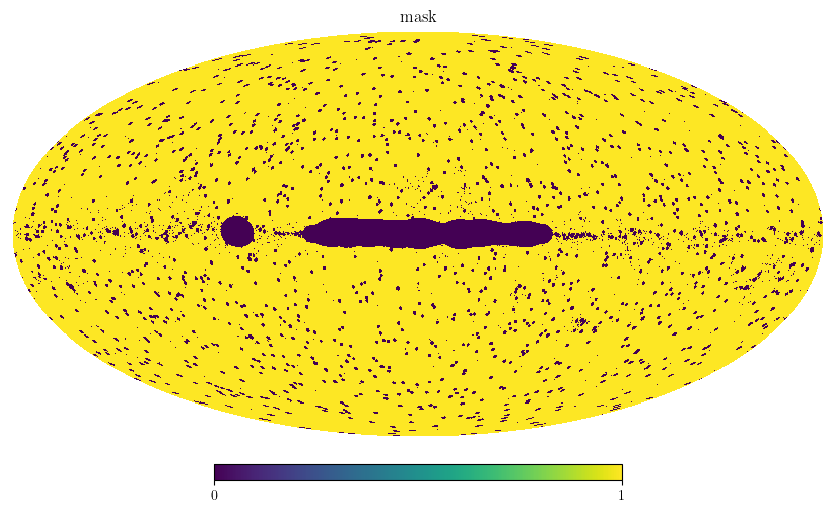

In [20]:
preprocessing_mask = HFImask*LFImask
hp.mollview(preprocessing_mask,title='mask')

plt.show()

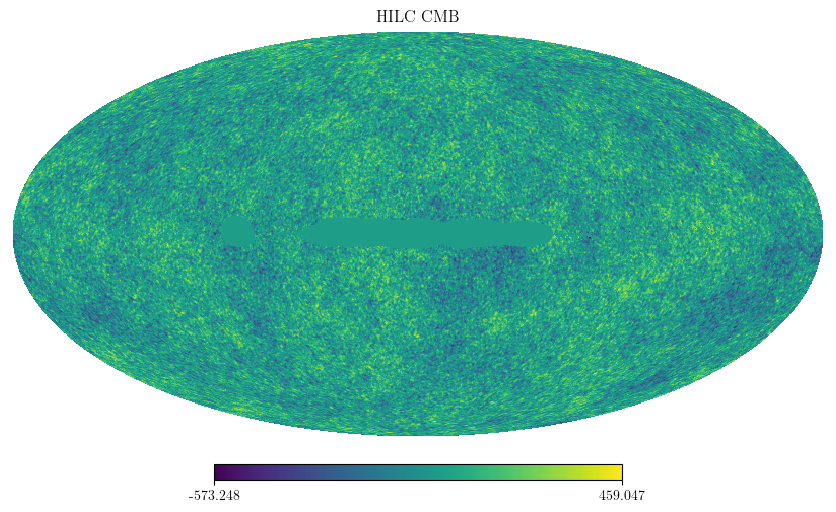

In [21]:
hp.mollview(preprocessing_mask*CMBmap_full,title='HILC CMB')
plt.show()

In [22]:
def get_power(mapp1,mapp2,mask,lmax=None):
    mean1 = np.sum(mapp1*mask)/np.sum(mask)
    mean2 = np.sum(mapp2*mask)/np.sum(mask)
    fsky = np.sum(mask)/mask.shape[0]
    return hp.anafast(mask*(mapp1-mean1),mask*(mapp2-mean2),lmax=lmax)/fsky


In [23]:
CMB_cells_full = get_power(CMBmap_full,CMBmap_full,preprocessing_mask,lmax = info_full.ELLMAX)
CMB_cells_RH1 = get_power(CMBmap_RH1,CMBmap_RH1,preprocessing_mask,lmax = info_full.ELLMAX)
CMB_cells_RH2 = get_power(CMBmap_RH2,CMBmap_RH2,preprocessing_mask,lmax = info_full.ELLMAX)
CMB_cells_split = get_power(CMBmap_RH1,CMBmap_RH2,preprocessing_mask,lmax = info_full.ELLMAX)

CMB_cells_noise = get_power(CMBmap_RH1-CMBmap_RH2,CMBmap_RH1-CMBmap_RH2,preprocessing_mask,lmax = info_full.ELLMAX)



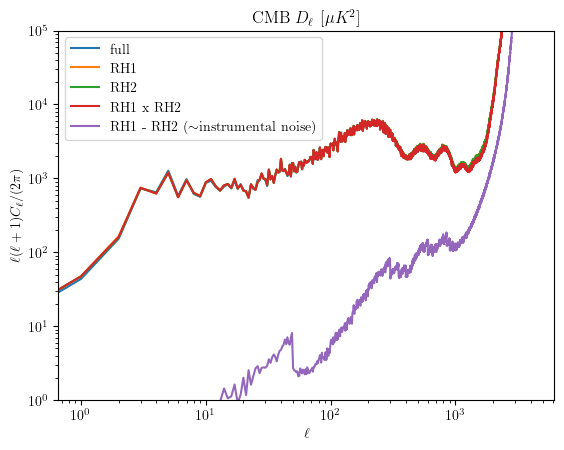

In [25]:
beam = info_full.common_beam[:,1]
ells=np.arange(CMB_cells_full.shape[0])
plt.plot(ells,ells*(ells+1)*CMB_cells_full/(2*np.pi)/beam**2,label='full')
plt.plot(ells,ells*(ells+1)*CMB_cells_RH1/(2*np.pi)/beam**2,label='RH1')
plt.plot(ells,ells*(ells+1)*CMB_cells_RH2/(2*np.pi)/beam**2,label='RH2')
plt.plot(ells,ells*(ells+1)*CMB_cells_split/(2*np.pi)/beam**2,label='RH1 x RH2')
plt.plot(ells,ells*(ells+1)*CMB_cells_noise/(2*np.pi)/beam**2,label=r'RH1 - RH2 ($\sim$instrumental noise)')

plt.title(r'CMB $D_\ell$ [$\mu K^2$]')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/(2\pi)$')

plt.ylim(1,1e5)
plt.legend()
plt.show()

# The oscillations in the "instrumental noise" spectra may look strange - shouldn't there be no
# CMB in the difference of the splits? This is in fact due to the different ell-bins in which we calculate
# the HILC. The noise is white in each bin, but not overall.